In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001285224"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001285224
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,WILSHIRE BANCORP INC
Ticker,WIBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,8.0,5.347500e+00,1.602273e+00,3.12,4.407500e+00,4.83,7.125000e+00,7.23
interest income,43.0,3.668733e+07,5.861726e+06,22539000.00,3.201900e+07,37464000.00,4.079900e+07,46750000.00
net income,43.0,7.568116e+06,1.304518e+07,-51193000.00,5.312500e+06,7823000.00,1.351550e+07,38469000.00
net interest income,14.0,1.953786e+07,1.766421e+06,14968000.00,1.908925e+07,19930000.00,2.081800e+07,21414000.00
provision for loan losses,10.0,2.258000e+06,1.628693e+06,720000.00,9.700000e+05,1415000.00,3.775000e+06,4750000.00


# Plots

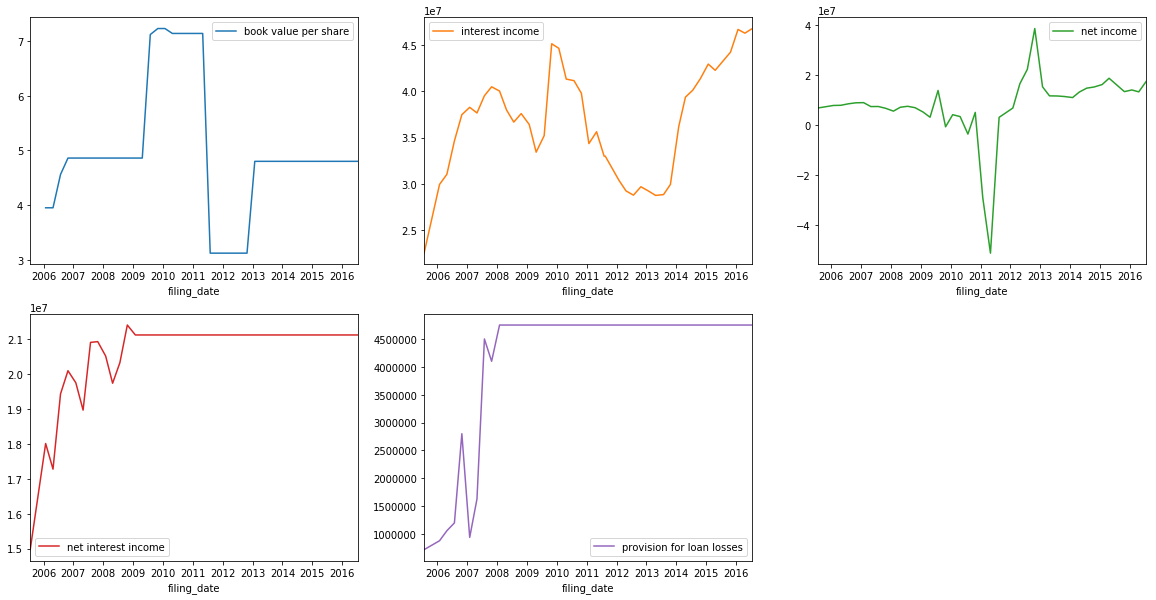

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001285224 book value per share        2005Q2 to 2005Q3: 2 periods    missing   
           book value per share                             2006Q1    missing   
           book value per share       2006Q4 to 2009Q1: 10 periods    missing   
           book value per share                             2009Q4    missing   
           book value per share        2010Q2 to 2011Q1: 4 periods    missing   
           book value per share        2011Q3 to 2012Q3: 5 periods    missing   
           book value per share       2013Q1 to 2016Q2: 14 periods    missing   
           interest income                                  2005Q3    missing   
           interest income                                  2011Q3    missing   
           interest income                                  2015Q2    missing   
           net income                                       2005Q3    missing   
           net income                                       2011Q2  duplicate   
           net income                                       2011Q3    missing   
           net income                                       2015Q2    missing   
           net interest income                              2005Q3    missing   
           net interest income        2009Q1 to 2016Q2: 30 periods    missing   
           provision for loan losses                        2005Q3    missing   
           provision for loan losses  2008Q1 to 2016Q2: 34 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001285224 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()